In [ ]:
from osgeo import gdal, ogr
import numpy as np
import matplotlib.pyplot as plt

loading image

In [ ]:
img_ds = gdal.Open('/content/drive/MyDrive/Radio/LISS III/BH_RA314NOV2023035991009100056PSANSTUC00GTDF/RA314NOV2023035991009100056PSANSTUC00GTDF.jpg', gdal.GA_ReadOnly)

Reading image bands

In [ ]:
band1 = img_ds.GetRasterBand(1)
band2 = img_ds.GetRasterBand(2)
band3 = img_ds.GetRasterBand(3)
band4 = img_ds.GetRasterBand(4)

convert img bands to arrays

In [ ]:
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Normalise the arrays

In [ ]:
b1 = b1 / b1.max()
b2 = b2 / b2.max()
b3 = b3 / b3.max()


Radiometric correction

In [ ]:
b1 = (b1 - b1.min()) / (b1.max() - b1.min())
b2 = (b2 - b2.min()) / (b2.max() - b2.min())
b3 = (b3 - b3.min()) / (b3.max() - b3.min())


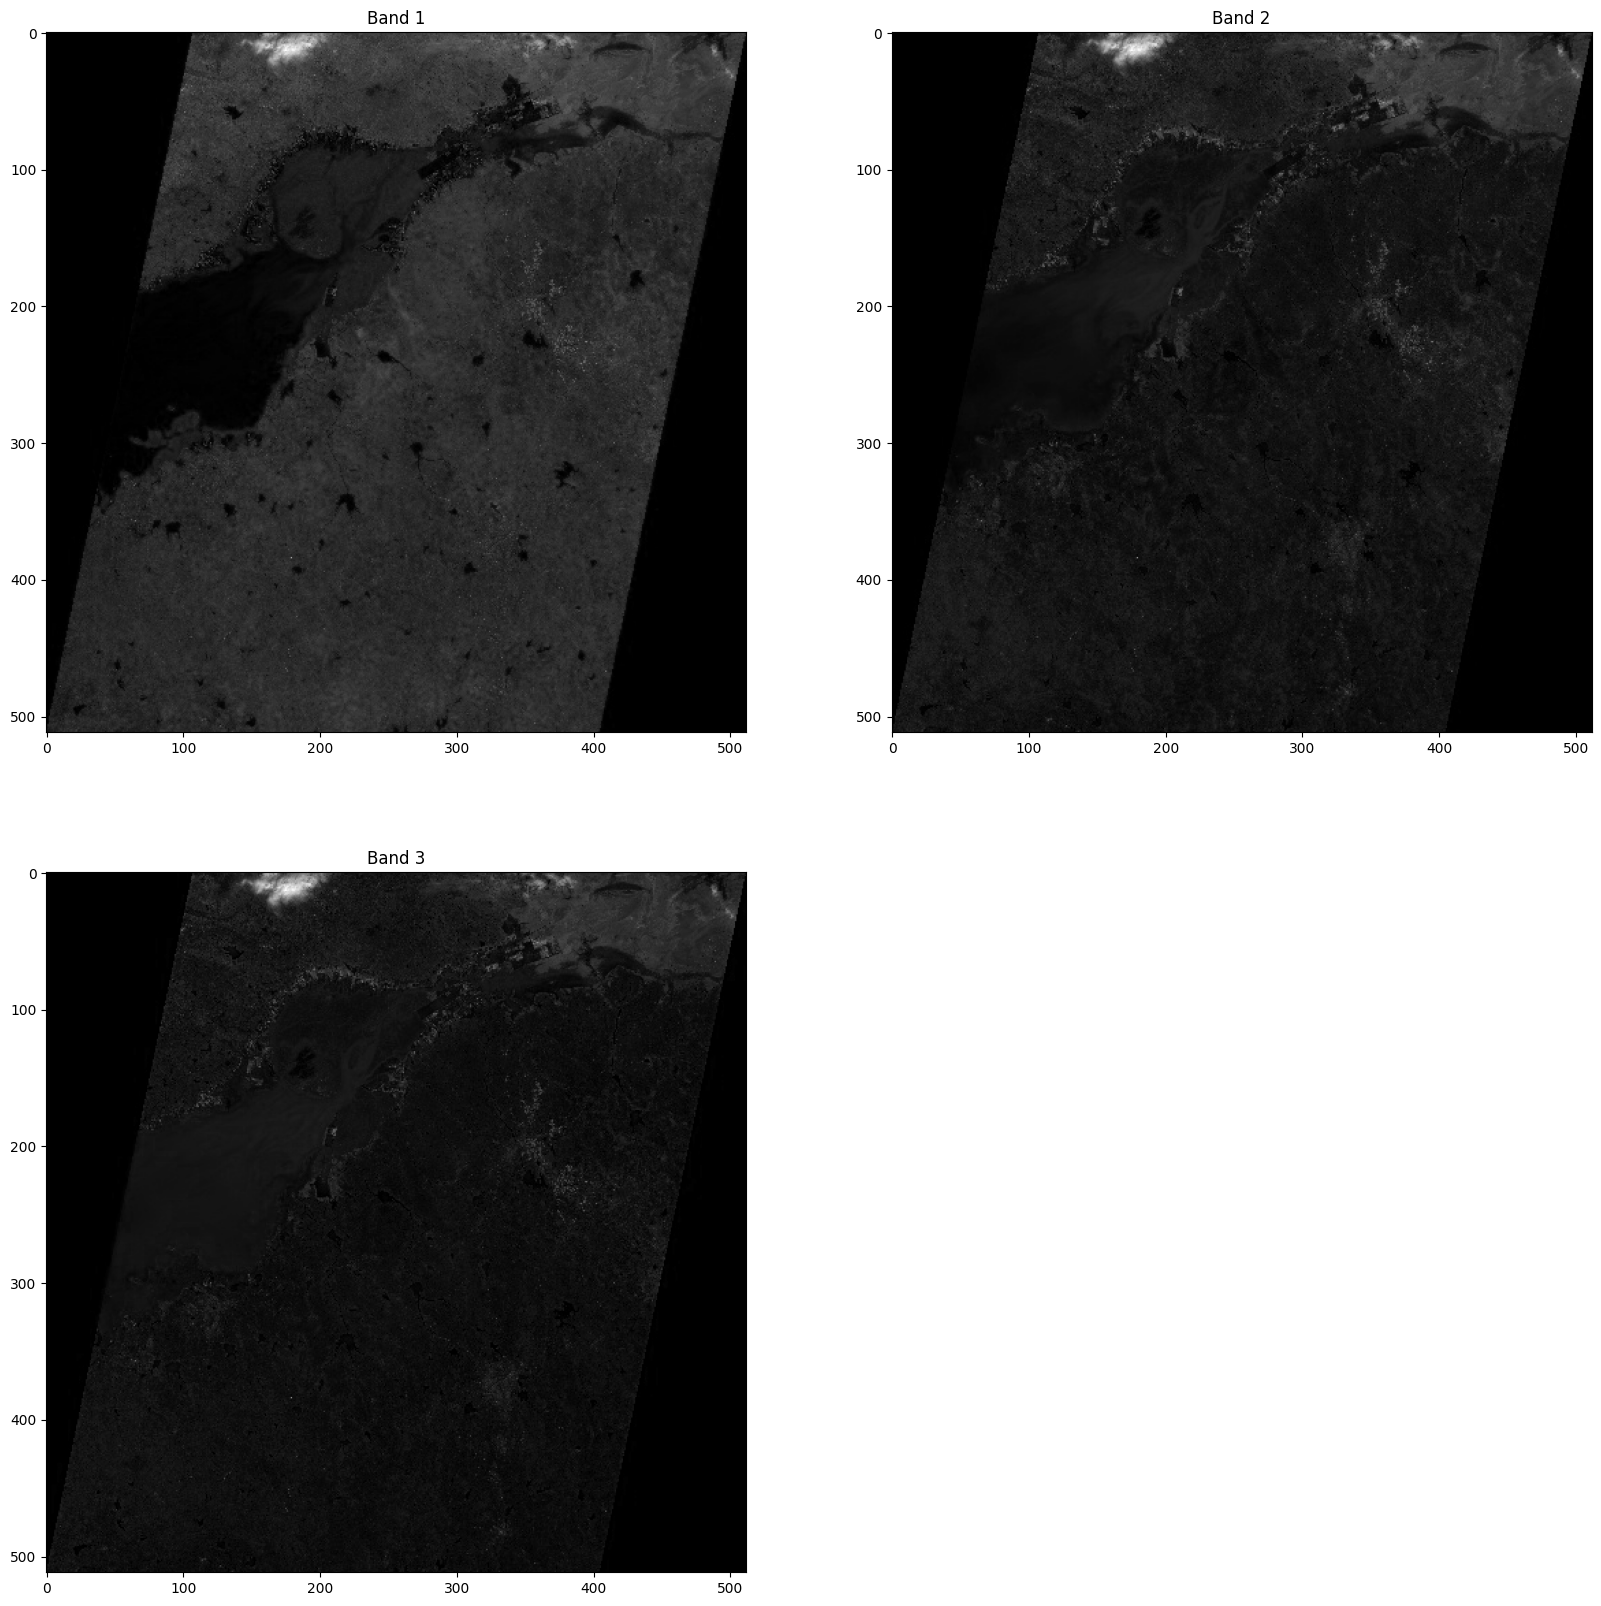

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.imshow(b1, cmap='gray')
plt.title("Band 1")

plt.subplot(222)
plt.imshow(b2, cmap='gray')
plt.title("Band 2")

plt.subplot(223)
plt.imshow(b3, cmap='gray')
plt.title("Band 3")


plt.show()

In [ ]:
from osgeo import gdal
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Step 1: Open the actual image and the reference image
img_ds = gdal.Open('/content/L7_S_2002.tif', gdal.GA_ReadOnly)
ref_ds = gdal.Open('/content/L7_S_2003.tif', gdal.GA_ReadOnly)



# Step 2: Read the band data into numpy arrays
img_array = np.array(img_ds.GetRasterBand(1).ReadAsArray()).astype(np.float32)
ref_array = np.array(ref_ds.GetRasterBand(1).ReadAsArray()).astype(np.float32)

img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
ref_array = (ref_array - np.min(ref_array)) / (np.max(ref_array) - np.min(ref_array))

X = img_array.flatten().reshape(-1,1)
y = ref_array.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0027200269594890316


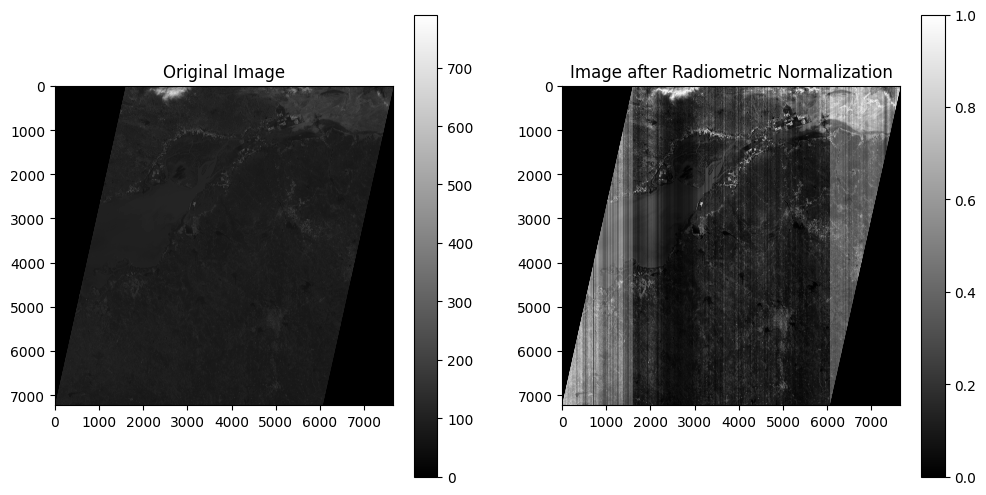

In [ ]:
img_ds = gdal.Open('/content/drive/MyDrive/Radio/LISS III/BH_RA314NOV2023035991009100056PSANSTUC00GTDF/BAND2.tif', gdal.GA_ReadOnly)
img_array = np.array(img_ds.GetRasterBand(1).ReadAsArray()).astype(np.float32)
scaler = MinMaxScaler()
img_array_normalized = scaler.fit_transform(img_array)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(img_array_normalized, cmap='gray')
plt.title('Image after Radiometric Normalization')
plt.colorbar()

plt.show()

In [ ]:
!pip install numpy scikit-learn tensorflow opencv-python


In [ ]:
from osgeo import gdal
import numpy as np


In [ ]:
img_ds = gdal.Open('/content/L7_S_2002.tif', gdal.GA_ReadOnly)
ref_ds = gdal.Open('/content/L7_S_2003.tif', gdal.GA_ReadOnly)

In [ ]:
# Assuming the images have 3 bands
img_band1 = img_ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
img_band2 = img_ds.GetRasterBand(2).ReadAsArray().astype(np.float32)
img_band3 = img_ds.GetRasterBand(3).ReadAsArray().astype(np.float32)

ref_band1 = ref_ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
ref_band2 = ref_ds.GetRasterBand(2).ReadAsArray().astype(np.float32)
ref_band3 = ref_ds.GetRasterBand(3).ReadAsArray().astype(np.float32)

In [ ]:
# Normalize each band
img_band1 = (img_band1 - np.min(img_band1)) / (np.max(img_band1) - np.min(img_band1))
img_band2 = (img_band2 - np.min(img_band2)) / (np.max(img_band2) - np.min(img_band2))
img_band3 = (img_band3 - np.min(img_band3)) / (np.max(img_band3) - np.min(img_band3))

ref_band1 = (ref_band1 - np.min(ref_band1)) / (np.max(ref_band1) - np.min(ref_band1))
ref_band2 = (ref_band2 - np.min(ref_band2)) / (np.max(ref_band2) - np.min(ref_band2))
ref_band3 = (ref_band3 - np.min(ref_band3)) / (np.max(ref_band3) - np.min(ref_band3))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = np.concatenate((img_band1.ravel(), img_band2.ravel(), img_band3.ravel()), axis=0)
y = np.concatenate((ref_band1.ravel(), ref_band2.ravel(), ref_band3.ravel()), axis=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier and train it
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Validate the model
y_pred = clf.predict(X_test)

In [ ]:
print(X_train)


L7_S_2002.tiff


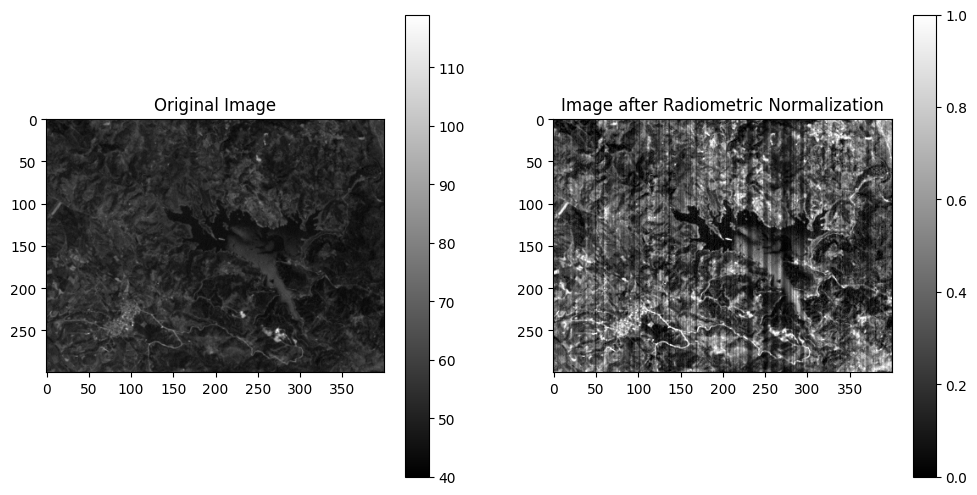

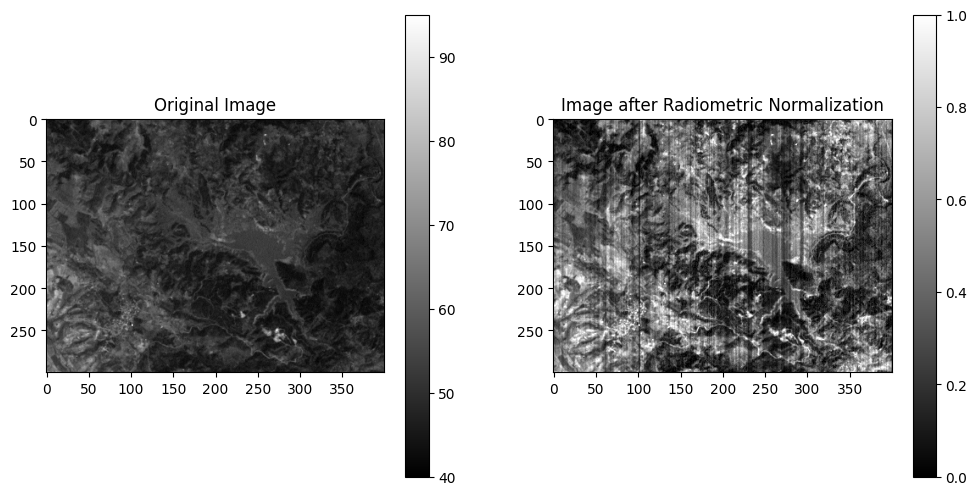

In [ ]:

img_ds = gdal.Open('/content/L7_S_2003.tif', gdal.GA_ReadOnly)
img_array = np.array(img_ds.GetRasterBand(1).ReadAsArray()).astype(np.float32)
scaler = MinMaxScaler()
img_array_normalized = scaler.fit_transform(img_array)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(img_array_normalized, cmap='gray')
plt.title('Image after Radiometric Normalization')
plt.colorbar()
plt.show()
img_ds = gdal.Open('/content/L7_S_2002.tif', gdal.GA_ReadOnly)
img_array = np.array(img_ds.GetRasterBand(1).ReadAsArray()).astype(np.float32)
scaler = MinMaxScaler()
img_array_normalized = scaler.fit_transform(img_array)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(img_array_normalized, cmap='gray')
plt.title('Image after Radiometric Normalization')
plt.colorbar()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
